# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

import seaborn as sns
# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
from sklearn.linear_model import LinearRegression

# Extra magic
%matplotlib inline
plt.rcParams['figure.dpi']=110
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf','svg')

pd.options.display.float_format = '{:.2f}'.format  # clean up float formatting

sns.set_style("darkgrid")
sns.set()


# @TODO: remove this for day-mode
# plt.style.use("dark_background")


from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    margin-left: 80px;
}
</style>
""")


# plt tick formatter
gbp_tick = mtick.StrMethodFormatter('£{x:,.0f}')
def format_ticks():
    """Formats Date vs Price Ticks (in matplotlib)"""
    
    plt.xlabel('Date')
    plt.ylabel('Price in GBP')

    # format ytick
    ax=plt.gca()
    ax.yaxis.set_major_formatter(gbp_tick) 
    

# utility - linear regression
def get_linregr_pred (df: pd.DataFrame) -> np.ndarray:
    """Return a linear regression prediction model from a DataFrame
    
    Keyword Arguments:
    df -- A DataFrame with 'Date' and 'Avg Price' columns, holding datetime objects and integer prices
    """
    # @TODO: Assert 'Date' and 'Avg Price' columns with datetime and float elements - throw TypeError
    
    # format the data into ndarrays
    x_arr = df['Date'].map(dt.datetime.toordinal).values.reshape(-1,1)
    y_arr = df['Avg Price'].values.reshape(-1,1)
    
    # create a linear regression
    linear_regressor = LinearRegression()  
    linear_regressor.fit(x_arr, y_arr)  # fit the model
    y_arr_pred = linear_regressor.predict(x_arr)
    
    return y_arr_pred

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,nan,E92000001
1,1995-01-01,91448.98,50460.23,93284.52,64958.09,71306.57,81671.48,120932.89,69158.16,79885.89,...,43958.48,44803.43,45544.52,48527.52,56701.60,74435.76,64018.88,54705.16,nan,53202.77
2,1995-02-01,82202.77,51085.78,93190.17,64787.92,72022.26,81657.56,119508.86,68951.10,80897.07,...,43925.42,44528.81,46051.57,49341.29,56593.59,72777.94,63715.02,54356.15,nan,53096.15
3,1995-03-01,79120.70,51268.97,92247.52,64367.49,72015.76,81449.31,120282.21,68712.44,81379.86,...,44434.87,45200.47,45383.82,49442.18,56171.18,73896.84,64113.61,53583.08,nan,53201.28
4,1995-04-01,77101.21,53133.51,90762.87,64277.67,72965.63,81124.41,120097.90,68610.05,82188.90,...,44267.78,45614.34,46124.23,49455.93,56567.90,74455.29,64623.22,54786.02,nan,53590.85


In [4]:
properties.tail()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
306,2020-06-01,869929.37,299073.95,517265.98,340723.46,485388.45,426898.68,850883.62,370456.24,466309.18,...,169091.27,168420.95,199120.86,202478.31,291766.66,478038.12,322662.03,259598.54,nan,249297.88
307,2020-07-01,785000.92,303701.25,521528.40,343385.11,485618.98,430221.36,814614.72,375913.66,468655.71,...,171624.49,169180.51,201103.35,204202.83,293858.02,484708.55,326940.86,265373.29,nan,250178.55
308,2020-08-01,794880.92,304696.04,525761.62,348045.92,496605.53,439342.12,826731.79,375617.57,485527.00,...,174482.78,172266.10,202542.31,205878.32,297786.29,492084.43,331706.33,266428.95,nan,252875.33
309,2020-09-01,768713.69,301170.13,535662.52,345460.83,522545.92,444722.50,834938.46,381611.22,498874.05,...,175602.22,173031.65,203638.42,208713.89,303354.51,496735.76,336074.25,273162.78,nan,256773.63
310,2020-10-01,721489.97,308583.05,536262.92,344253.67,518636.49,451012.93,857205.09,385488.27,518391.71,...,177795.85,177114.89,207604.65,210637.04,300744.21,490935.93,337412.20,274319.43,nan,259158.77


In [5]:
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.00,0.00,0.00
mean,nan,nan,nan
std,nan,nan,nan
min,nan,nan,nan
25%,nan,nan,nan
50%,nan,nan,nan
75%,nan,nan,nan
max,nan,nan,nan


In [6]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            310 non-null    datetime64[ns]
 1   City of London        311 non-null    object        
 2   Barking & Dagenham    311 non-null    object        
 3   Barnet                311 non-null    object        
 4   Bexley                311 non-null    object        
 5   Brent                 311 non-null    object        
 6   Bromley               311 non-null    object        
 7   Camden                311 non-null    object        
 8   Croydon               311 non-null    object        
 9   Ealing                311 non-null    object        
 10  Enfield               311 non-null    object        
 11  Greenwich             311 non-null    object        
 12  Hackney               311 non-null    object        
 13  Hammersmith & Fulham

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [7]:
props_tp= properties.transpose()
props_tp.iloc[0:10,0:10]
#iloc lets you print columns, you specify the row and width

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00
City of London,E09000001,91448.98,82202.77,79120.70,77101.21,84409.15,94900.51,110128.04,112329.44,104473.11
Barking & Dagenham,E09000002,50460.23,51085.78,51268.97,53133.51,53042.25,53700.35,52113.12,52232.20,51471.61
Barnet,E09000003,93284.52,93190.17,92247.52,90762.87,90258.00,90107.23,91441.25,92361.32,93273.12
Bexley,E09000004,64958.09,64787.92,64367.49,64277.67,63997.14,64252.32,63722.70,64432.60,64509.55
Brent,E09000005,71306.57,72022.26,72015.76,72965.63,73704.05,74310.48,74127.04,73547.04,73789.54
Bromley,E09000006,81671.48,81657.56,81449.31,81124.41,81542.62,82382.83,82898.52,82054.37,81440.43
Camden,E09000007,120932.89,119508.86,120282.21,120097.90,119929.28,121887.46,124027.58,125529.80,120596.85
Croydon,E09000008,69158.16,68951.10,68712.44,68610.05,68844.92,69052.51,69142.48,68993.43,69393.50
Ealing,E09000009,79885.89,80897.07,81379.86,82188.90,82077.06,81630.66,82352.22,82706.66,82011.08


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [8]:
props_tp.columns = props_tp.iloc[0].rename('Date')
props_tp.iloc[0:10,0:10]

Date,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00
City of London,E09000001,91448.98,82202.77,79120.70,77101.21,84409.15,94900.51,110128.04,112329.44,104473.11
Barking & Dagenham,E09000002,50460.23,51085.78,51268.97,53133.51,53042.25,53700.35,52113.12,52232.20,51471.61
Barnet,E09000003,93284.52,93190.17,92247.52,90762.87,90258.00,90107.23,91441.25,92361.32,93273.12
Bexley,E09000004,64958.09,64787.92,64367.49,64277.67,63997.14,64252.32,63722.70,64432.60,64509.55
Brent,E09000005,71306.57,72022.26,72015.76,72965.63,73704.05,74310.48,74127.04,73547.04,73789.54
Bromley,E09000006,81671.48,81657.56,81449.31,81124.41,81542.62,82382.83,82898.52,82054.37,81440.43
Camden,E09000007,120932.89,119508.86,120282.21,120097.90,119929.28,121887.46,124027.58,125529.80,120596.85
Croydon,E09000008,69158.16,68951.10,68712.44,68610.05,68844.92,69052.51,69142.48,68993.43,69393.50
Ealing,E09000009,79885.89,80897.07,81379.86,82188.90,82077.06,81630.66,82352.22,82706.66,82011.08


In [9]:
#drop first row (Unnamed 0) which we turn into column labels, but arent values 
props_tp=props_tp.reset_index().drop(0)
props_tp.iloc[0:10,0:10]

Date,index,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00
1,City of London,E09000001,91448.98,82202.77,79120.70,77101.21,84409.15,94900.51,110128.04,112329.44
2,Barking & Dagenham,E09000002,50460.23,51085.78,51268.97,53133.51,53042.25,53700.35,52113.12,52232.20
3,Barnet,E09000003,93284.52,93190.17,92247.52,90762.87,90258.00,90107.23,91441.25,92361.32
4,Bexley,E09000004,64958.09,64787.92,64367.49,64277.67,63997.14,64252.32,63722.70,64432.60
5,Brent,E09000005,71306.57,72022.26,72015.76,72965.63,73704.05,74310.48,74127.04,73547.04
6,Bromley,E09000006,81671.48,81657.56,81449.31,81124.41,81542.62,82382.83,82898.52,82054.37
7,Camden,E09000007,120932.89,119508.86,120282.21,120097.90,119929.28,121887.46,124027.58,125529.80
8,Croydon,E09000008,69158.16,68951.10,68712.44,68610.05,68844.92,69052.51,69142.48,68993.43
9,Ealing,E09000009,79885.89,80897.07,81379.86,82188.90,82077.06,81630.66,82352.22,82706.66
10,Enfield,E09000010,72514.69,73155.20,72190.44,71442.92,70630.78,71348.31,71837.54,72237.95


In [10]:
#clean up column names
props_tp_rn= props_tp.rename(columns={'index':'London Borough',pd.NaT:'ID'})
props_tp_rn.iloc[0:5,0:2]


Date,London Borough,ID
1,City of London,E09000001
2,Barking & Dagenham,E09000002
3,Barnet,E09000003
4,Bexley,E09000004
5,Brent,E09000005


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [11]:
#get rid of extraneous rows(and Nans) is easier if we do it before we melt the frame
#first row isn't a borough
props_clean=props_tp_rn.iloc[1:33].reset_index(drop=True)

#sanity check
props_clean.describe()

Date,London Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
count,32,32,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,...,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
unique,32,32,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,...,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
top,Richmond upon Thames,E09000018,76287.57,111103.04,72190.44,106875.00,69759.22,79956.36,124027.58,73275.17,...,361599.75,435391.77,1342975.30,368575.63,292477.85,569407.24,370943.49,502552.10,704188.81,521342.55
freq,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [12]:
df= props_clean.melt(id_vars=['London Borough', 'ID'], value_name='Avg Price',)
df.head()


,London Borough,ID,Date,Avg Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.23
1,Barnet,E09000003,1995-01-01,93284.52
2,Bexley,E09000004,1995-01-01,64958.09
3,Brent,E09000005,1995-01-01,71306.57
4,Bromley,E09000006,1995-01-01,81671.48


In [13]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London Borough  9920 non-null   object        
 1   ID              9920 non-null   object        
 2   Date            9920 non-null   datetime64[ns]
 3   Avg Price       9920 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 310.1+ KB


In [14]:
#case avg price col to flotingpt
df['Avg Price']= df['Avg Price'].apply(float)

In [15]:
#checking datatype modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London Borough  9920 non-null   object        
 1   ID              9920 non-null   object        
 2   Date            9920 non-null   datetime64[ns]
 3   Avg Price       9920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 310.1+ KB


In [16]:
df.head()

,London Borough,ID,Date,Avg Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.23
1,Barnet,E09000003,1995-01-01,93284.52
2,Bexley,E09000004,1995-01-01,64958.09
3,Brent,E09000005,1995-01-01,71306.57
4,Bromley,E09000006,1995-01-01,81671.48


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [17]:
df.loc[:,df.isnull().any()]

""
0
1
2
3
4
...
9915
9916
9917
9918


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [18]:
barnet=df[df['London Borough']=='Barnet']
barnet.head()

,London Borough,ID,Date,Avg Price
1,Barnet,E09000003,1995-01-01,93284.52
33,Barnet,E09000003,1995-02-01,93190.17
65,Barnet,E09000003,1995-03-01,92247.52
97,Barnet,E09000003,1995-04-01,90762.87
129,Barnet,E09000003,1995-05-01,90258.00


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

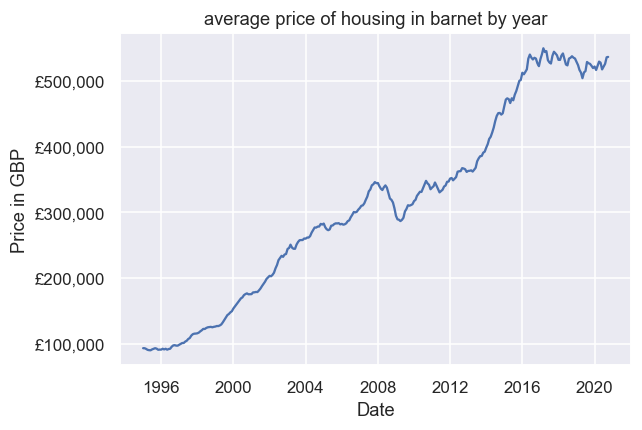

In [19]:
plt.plot(barnet['Date'],barnet['Avg Price'])
plt.title("average price of housing in barnet by year")

format_ticks()
plt.show()

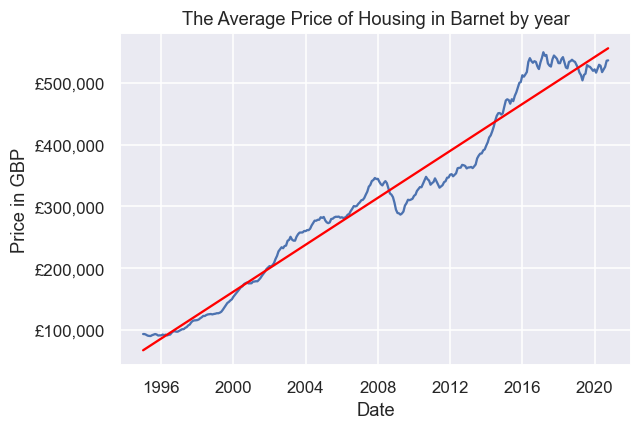

In [20]:
#previous plot looks pretty linear-->linear regression?
#basic line plot for Barnet
plt.plot(barnet['Date'],barnet['Avg Price'])
#add linear regression
y_barnet_pred=get_linregr_pred(barnet)
plt.plot(barnet['Date'], y_barnet_pred, color='red')

plt.title("The Average Price of Housing in Barnet by year")
format_ticks()
plt.show()

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [ ]:
Barnet - Pre 2008

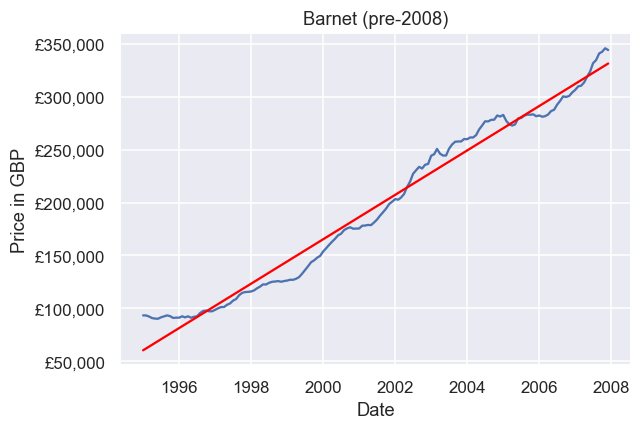

In [21]:
# An exploration of slicing, and refitting for Barnet borough
# Pre 2008 housing crisis

barnet9508 = barnet[barnet['Date'] < '2008']

# basic line plot for Barnet up to 2008
plt.plot(barnet9508['Date'], barnet9508['Avg Price'])

# Add a linear regression
y_barnet_pred = get_linregr_pred(barnet9508)
plt.plot(barnet9508['Date'], y_barnet_pred, color='red')

plt.title("Barnet (pre-2008)")
format_ticks()
plt.show()

In [ ]:
Barnet - Post 2008

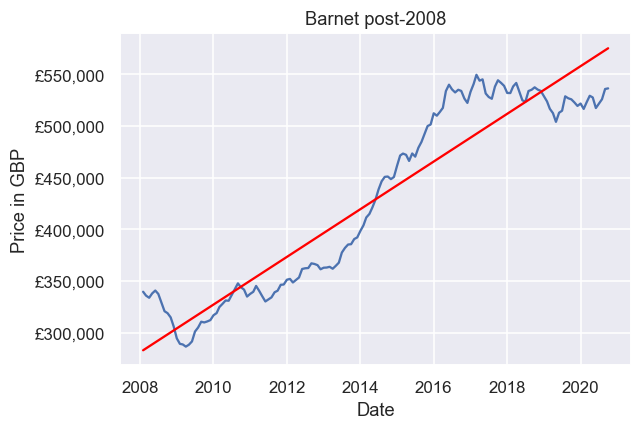

In [25]:
#exploration of slicing, refitting for barnet obrough
#post 2008 housing crisis

barnet08on = barnet[barnet['Date']>'2008']

plt.plot(barnet08on['Date'], barnet08on['Avg Price'])

# Add a linear regression
y_barnet_pred = get_linregr_pred(barnet08on)
plt.plot(barnet08on['Date'], y_barnet_pred, color='red')

plt.title("Barnet post-2008")
format_ticks()
plt.show()


In [ ]:
Camden Plot

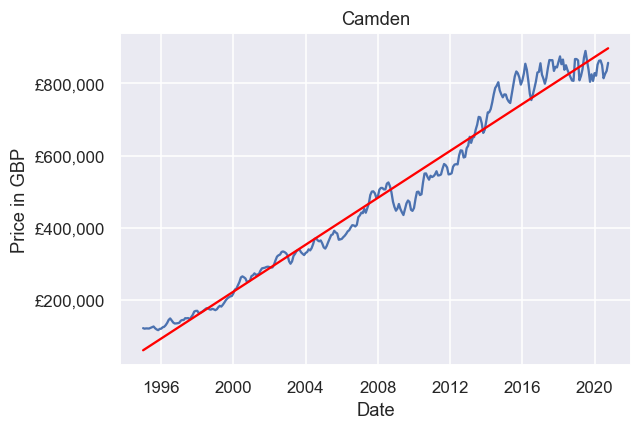

In [26]:
# subset for Camden
camden = df[df['London Borough'] == 'Camden']

# basic line plot for Camden
plt.plot(camden['Date'], camden['Avg Price'])

# Add a linear Regression 
ycamden_pred = get_linregr_pred(camden)
plt.plot(camden['Date'], ycamden_pred, color='red')

plt.title("Camden")
format_ticks()
plt.show()

In [ ]:
Westminister Plot

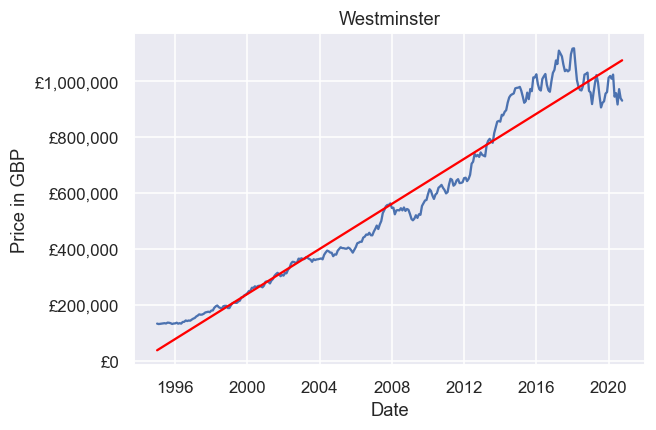

In [27]:
# subset for Westminster
westminster = df[df['London Borough'] == 'Westminster']

# basic line plot for Westminster
plt.plot(westminster['Date'], westminster['Avg Price'])

# Add a linear Regression 
ywestminster_pred = get_linregr_pred(westminster)
plt.plot(westminster['Date'], ywestminster_pred, color='red')

plt.title("Westminster")
format_ticks()
plt.show()

In [ ]:
#Answering the question: which oborugh has seen the greatest price increases?
#We can answer this question by fitting a linear regression line to each borough and sorting the coefficient of each line. 
#The lines with the largest coefficient values will have the greatest relative price increase.

In [28]:
#loop and check regression coefficient for each borough and get max
#max coefficient= greatest avg rate of change-->highest avg delta price

dfc= pd.DataFrame() #dataframe with coeffs
#loop over unique boroughs

for b in df['London Borough'].unique():
    #subset the borough from main df
    df_sub=df[df['London Borough']==b]
    
    #reshape data 
    Xsub = df_sub['Date'].map(dt.datetime.toordinal).values.reshape(-1,1)
    Ysub = df_sub['Avg Price'].values.reshape(-1,1)
    
    # fit the linear regressor
    regr = LinearRegression().fit(Xsub, Ysub)
    
    # generate a dataframe of coefficents
    dfc[b] = regr.coef_[0]
    
# reshape and label the dataframe
dfcm = dfc.melt()
dfcm.columns = ['London Borough', 'regr coef']

#sort the dataframe by coefficients aka growth rate
dfcm = dfcm.sort_values('regr coef', ascending=False)

print('\n\nThe London Borough that showed the highest average growth ' +
      f'between 1996 and 2020 is: {dfcm.iloc[0,0]}\n\n' +
     'The top 5 are listed below:\n')


dfcm.head()



The London Borough that showed the highest average growth between 1996 and 2020 is: Kensington & Chelsea

The top 5 are listed below:



,London Borough,regr coef
18,Kensington & Chelsea,145.11
31,Westminster,110.23
5,Camden,89.11
11,Hammersmith & Fulham,77.49
17,Islington,68.74


In [ ]:
#Visualizing the relative price increases
#By plotting the coefficients, we can visually assess the relative performance of each borough in regard to potential profit over time.

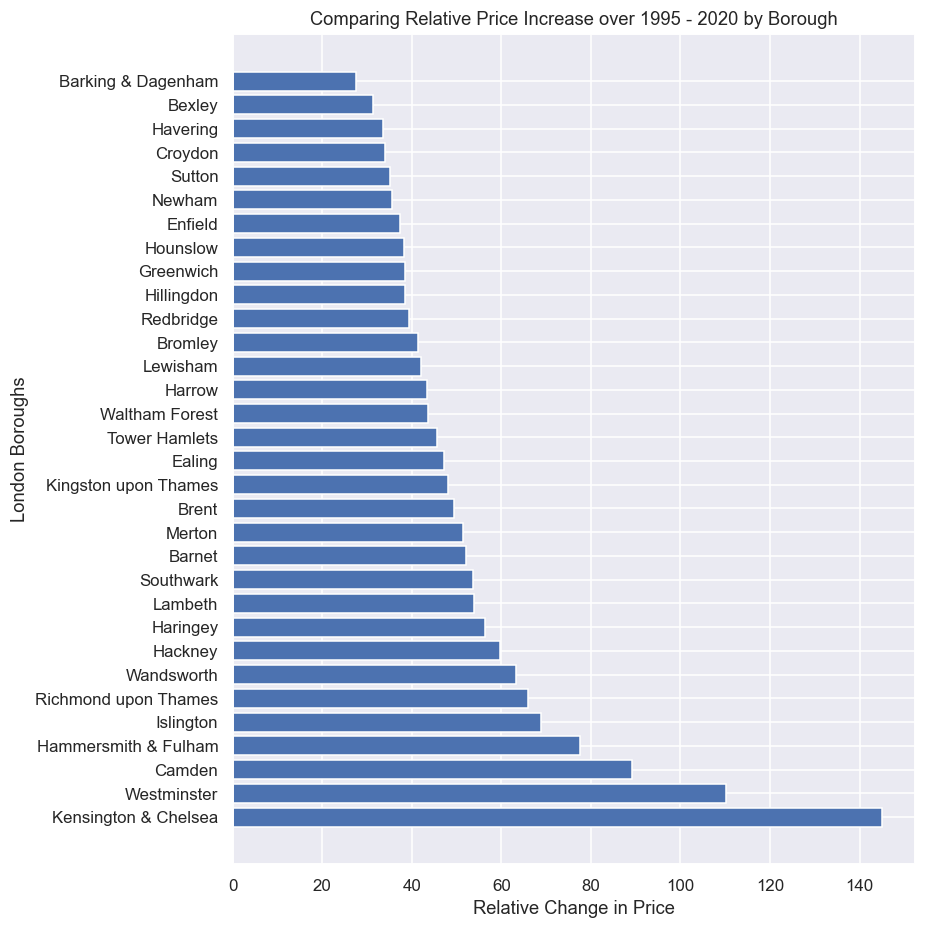

In [30]:

# generate a horizontal bar plot to visualize the delta price

fig, ax = plt.subplots(figsize=(8,10))

ypos = np.arange(len(dfcm))
ax.barh(ypos, dfcm['regr coef'])

# remove the xticks because the actual coef value is not useful
#plt.tick_params(axis='x', labelbottom=False)

ax.set_xlabel('Relative Change in Price')
ax.set_ylabel('London Boroughs')
ax.set_yticks(ypos)
ax.set_yticklabels(dfcm['London Borough'])

plt.title(f"Comparing Relative Price Increase over {df['Date'].min().year} - {df['Date'].max().year} by Borough")
plt.show()

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

In [ ]:
Our original goal was to determine the borough with the greatest change in price...we plotted the price increase of each borough over time to get a visual representation of the data.
Then we did a linear regression on each of the graphs, and we know the graph with the highest linear coefficient must be our answer.


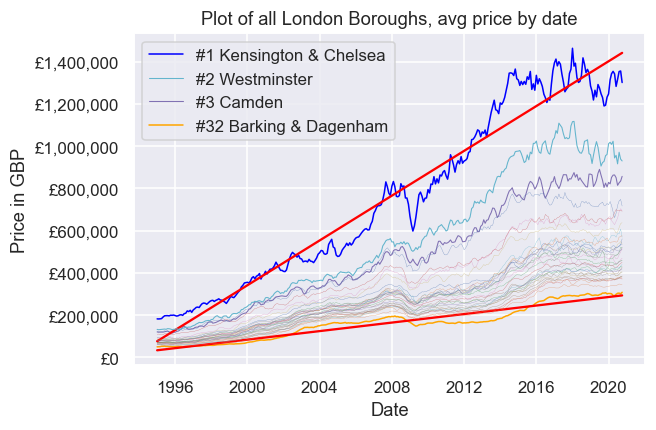

In [33]:

# Loop over and plot all of the boroughs together

for b in df['London Borough'].unique():
    
    # subset the borough from the main df
    df_sub = df[df['London Borough'] == b]
    
    # fit the linear regressor for the highest and lowest positive delta price
    # @TODO: remove the hard-coding
    if b == 'Kensington & Chelsea':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=1, color='blue', label='#1 '+b)                
        ydfsub_pred = get_linregr_pred(df_sub)  
        plt.plot(df_sub['Date'], ydfsub_pred, color='red')
        
    elif b == 'Barking & Dagenham':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=1, color='orange', label='#32 '+b)
        ydfsub_pred = get_linregr_pred(df_sub)  
        plt.plot(df_sub['Date'], ydfsub_pred, color='red') 
        
    elif b == 'Westminster':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=0.7, label='#2 '+b)
        
    elif b == 'Camden':
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=0.7, label='#3 '+b)
        
    else:
        # plot the other boroughs without a regression line
        plt.plot(df_sub['Date'], df_sub['Avg Price'], linewidth=0.2, alpha=0.8)



plt.title("Plot of all London Boroughs, avg price by date")

# re-sort the legend for readability @TODO: sort programmatically
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
labels = [labels[2], labels[3], labels[1], labels[0]]
handles = [handles[2], handles[3], handles[1], handles[0]]
ax.legend(handles, labels, loc='upper left')

format_ticks()
plt.show()